# 20기 Clustering 정규세션 과제

**데이터:** [Mall Customer Segmentation Data| Kaggle](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


---

## 0. 데이터 불러오기

In [25]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/대외활동/동아리/투빅스/4주차/Mall_Customers.csv", index_col = 0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


## 1. Preprocssing / EDA

<Axes: >

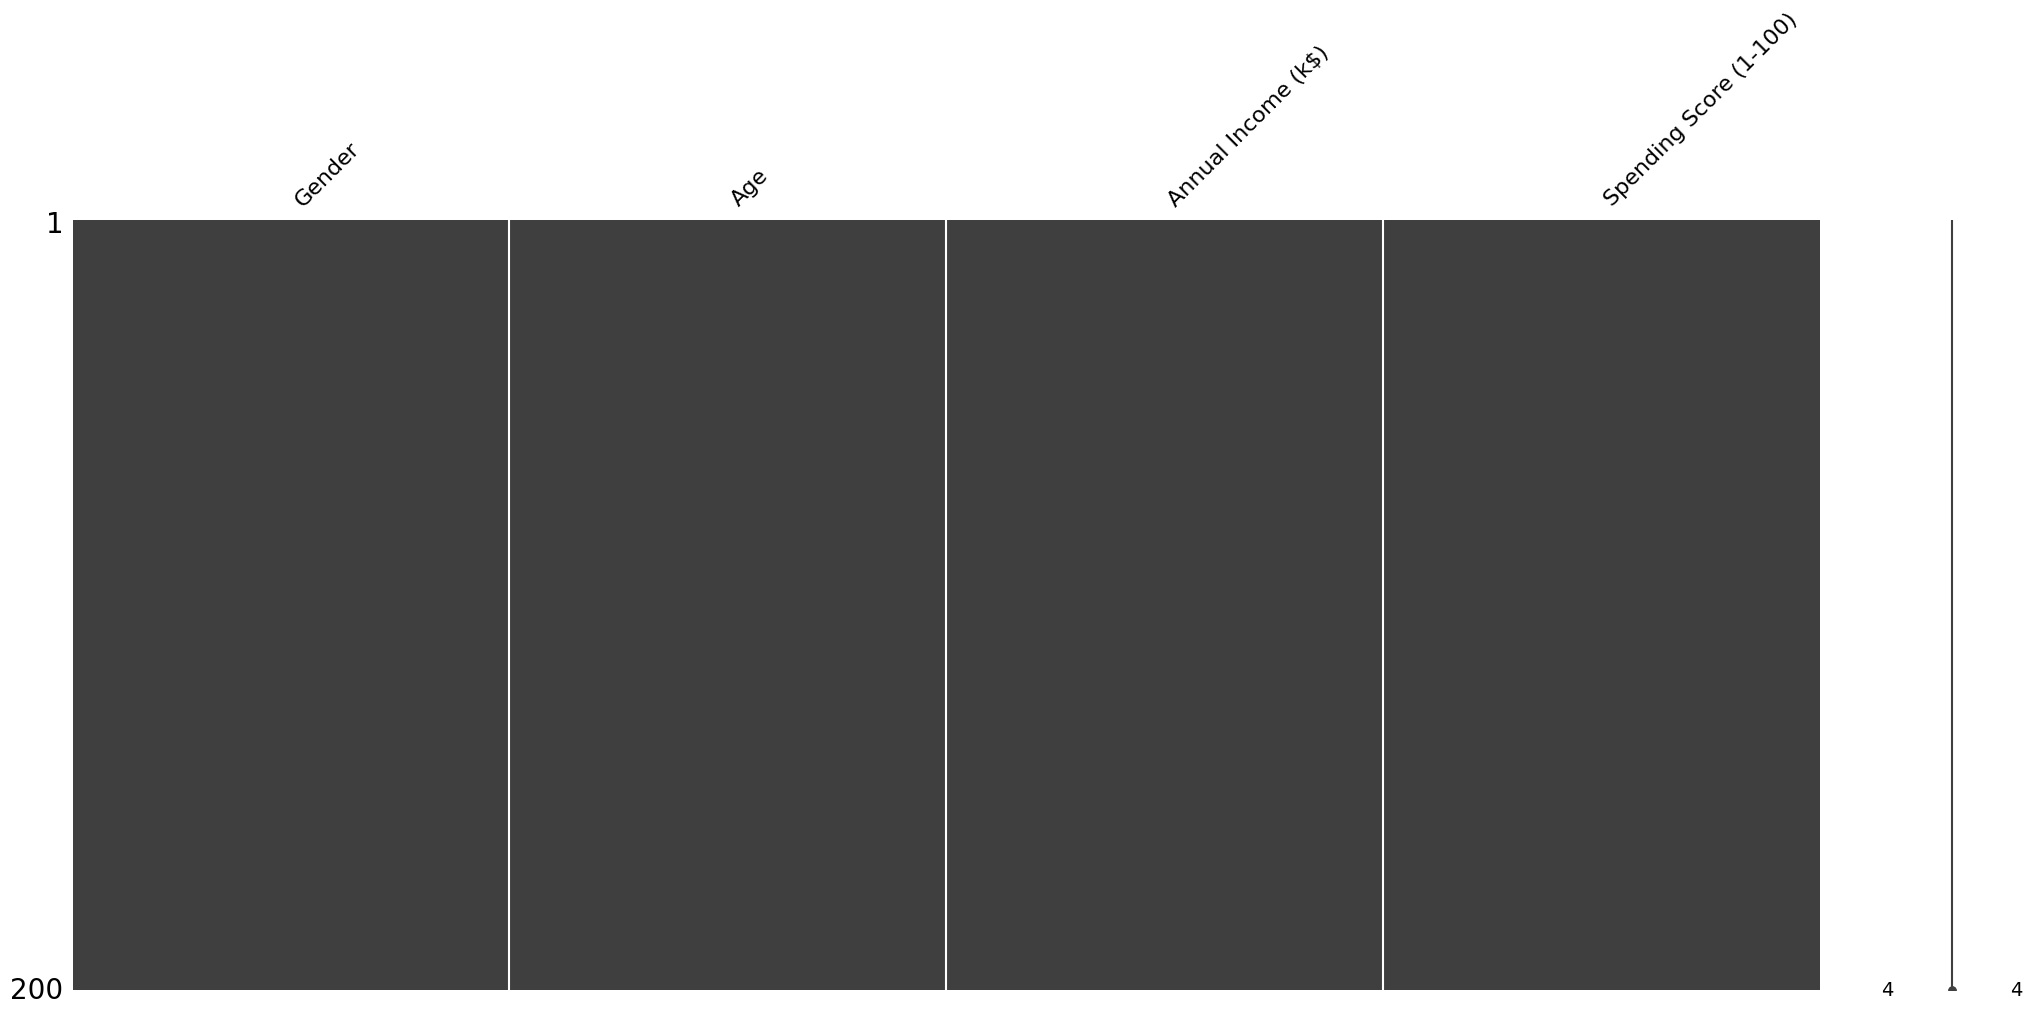

In [26]:
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

msno.matrix(df)

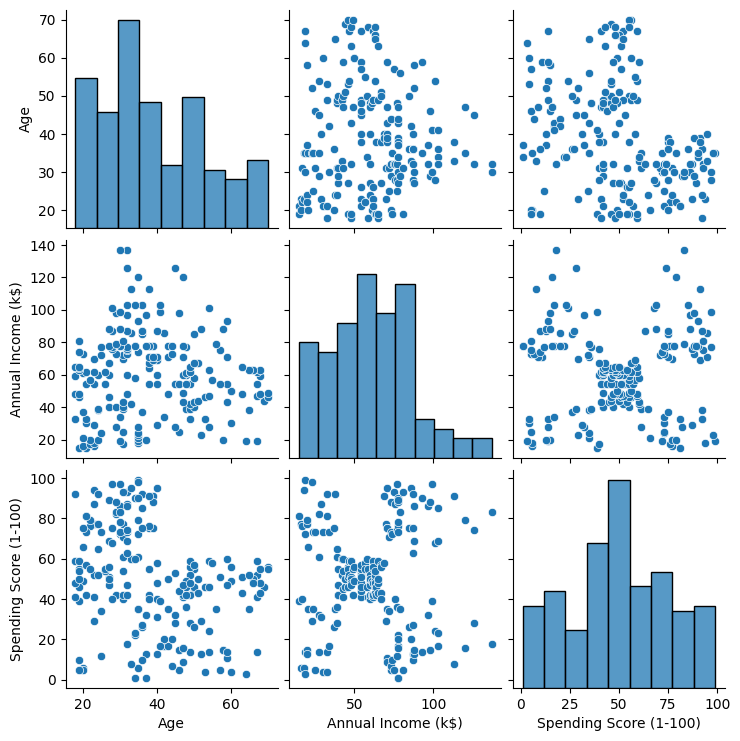

In [38]:
sns.pairplot(df)

In [39]:
!pip install plotnine

<Figure size 640x480 with 0 Axes>

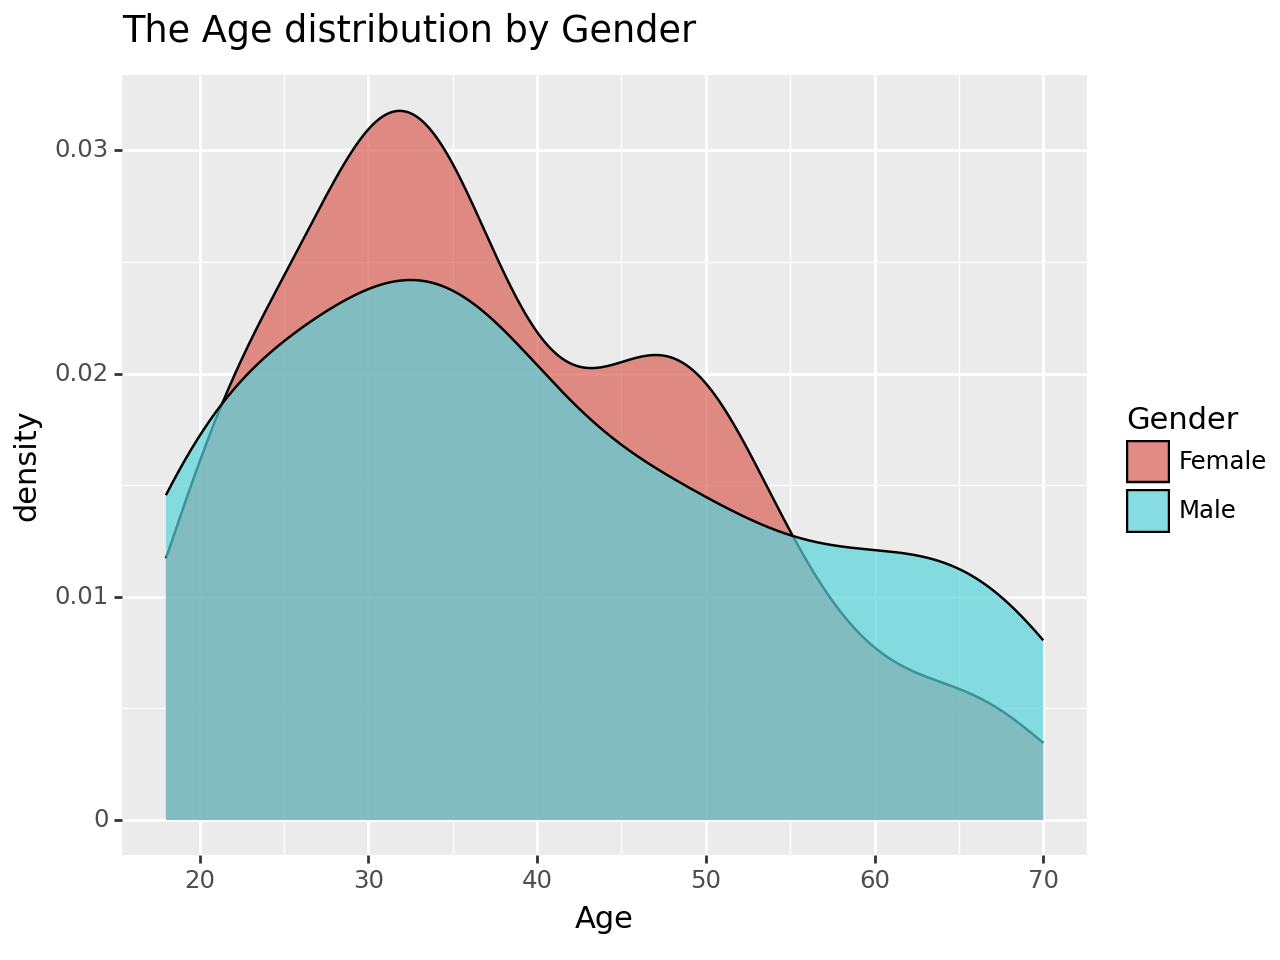

<Figure Size: (640 x 480)>

In [42]:
from plotnine import *
fig = plt.figure()

ggplot(df, aes(x='Age', fill='Gender')) + geom_density(alpha=0.7) + ggtitle("The Age distribution by Gender")

In [27]:
from sklearn.preprocessing import MinMaxScaler
df_drop = df.drop("Gender", axis=1)
columns = df_drop.columns.tolist()
scaler = MinMaxScaler()
for col in columns:
    df_drop.loc[:, col] = scaler.fit_transform(np.array(df_drop[col]).reshape(-1, 1))
df_drop = df_drop.iloc[:, :2]

## 2. Clustering & 3. Evaluation

In [28]:
df_drop_x = df_drop.iloc[:, :2]

In [ ]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(df_drop_x)
    wcss.append(kmeans.inertia_)

In [36]:
from sklearn.metrics import silhouette_score
def get_kmeans_silhouette(df):
    best_n = 1
    best_score = -1

    for n_cluster in range(2, 11):
        kmeans = KMeans(n_clusters = n_cluster)
        kmeans.fit(df)
        cluster = kmeans.predict(df)
        score = silhouette_score(df, cluster)

        print("클러스터의 수 : {}, 실루엣 점수 : {:.3f}".format(n_cluster, score))
        if score > best_score:
            best_n = n_cluster
            best_score = score

    print("\n가장 높은 실루엣 점수를 가진 클러스터 수 : {}, 실루엣 점수 : {:.3f}".format(best_n, best_score))

In [37]:
get_kmeans_silhouette(df_drop_x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


클러스터의 수 : 2, 실루엣 점수 : 0.413
클러스터의 수 : 3, 실루엣 점수 : 0.440


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


클러스터의 수 : 4, 실루엣 점수 : 0.385


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


클러스터의 수 : 5, 실루엣 점수 : 0.376
클러스터의 수 : 6, 실루엣 점수 : 0.390


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


클러스터의 수 : 7, 실루엣 점수 : 0.401


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


클러스터의 수 : 8, 실루엣 점수 : 0.410


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


클러스터의 수 : 9, 실루엣 점수 : 0.405


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


클러스터의 수 : 10, 실루엣 점수 : 0.397

가장 높은 실루엣 점수를 가진 클러스터 수 : 3, 실루엣 점수 : 0.440


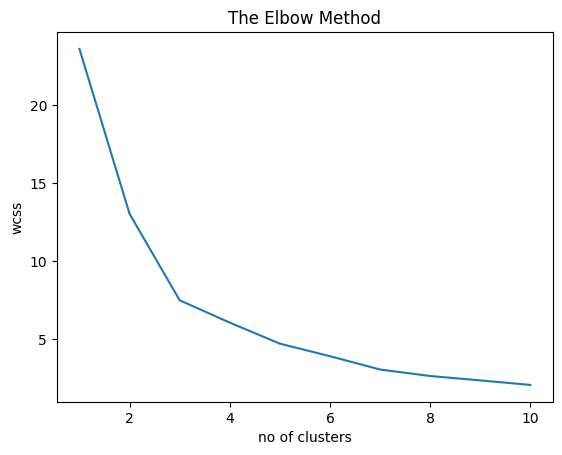

In [30]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [33]:
# k가 3인 Kmean 선언
kmeans = KMeans(n_clusters = 3)
# 모델 학습
kmeans.fit(df_drop_x)
# cluster 할당
cluster = kmeans.predict(df_drop_x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


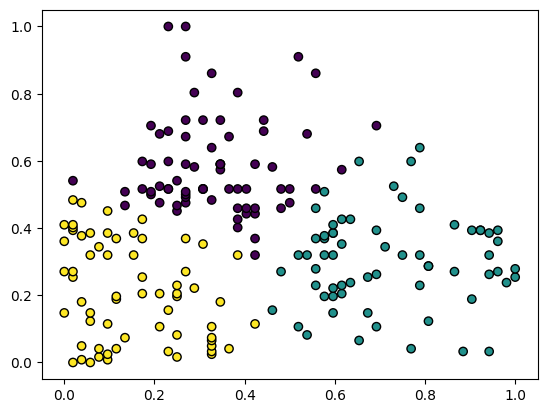

In [35]:
plt.scatter(df_drop_x['Age'], df_drop_x['Annual Income (k$)'], linewidth = 1, c = cluster, edgecolor = 'black')
plt.show()

- 빨간색 : 나이가 어리고 수입이 별로 없는 군집
- 하얀색 : 나이대는 주로 젊고 수입이 많은 군집
- 검정색 : 나이대는 많지만 수입이 그렇게 많지 않은 군집